# CREATION D'UN DATASET DE CLASSIFICATION BINAIRE SYNTETHIQUE 


In [6]:
import numpy as np
import pandas as pd
#!pip intstall imblearn
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE


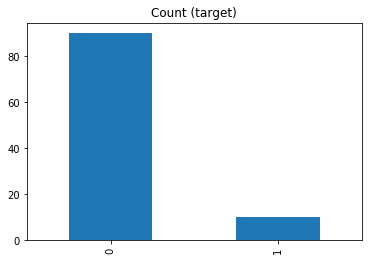

In [7]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)')



# Utiliser des méthodes de rééchantillonnage 

In [8]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

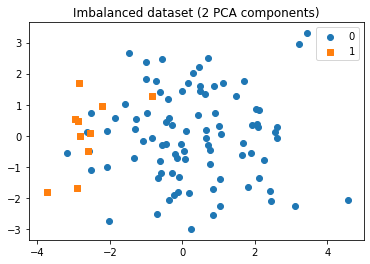

In [9]:

    
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')



Removed indexes:


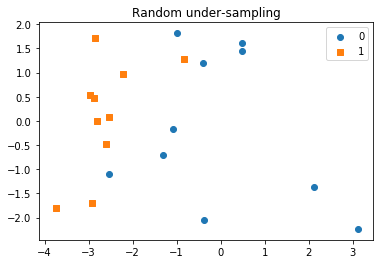

In [10]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)

print('Removed indexes:')

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

80 new random picked points


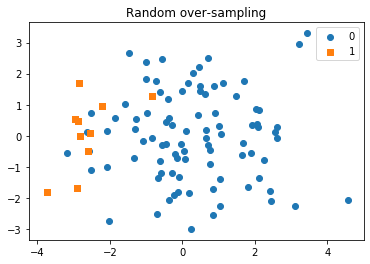

In [11]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

# Under-sampling: Tomek links

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In the code below, we'll use ratio='majority' to resample the majority class.


Removed indexes:


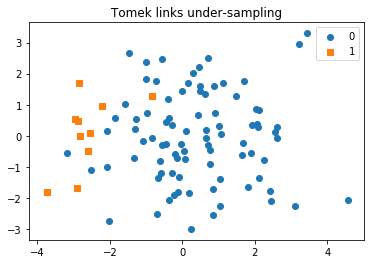

In [12]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_sample(X, y)

print('Removed indexes:')

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

# Sous-échantillonnage : Centroïdes en grappe

Cette technique effectue un sous-échantillonnage en générant des centroïdes selon des méthodes de regroupement. Les données seront préalablement regroupées par similarité, afin de préserver les informations.

Dans cet exemple, nous allons passer le dict {0 : 10} pour le rapport des paramètres, afin de préserver 10 éléments de la classe majoritaire (0), et de toute la classe minoritaire (1) .


Traduit avec www.DeepL.com/Translator (version gratuite)

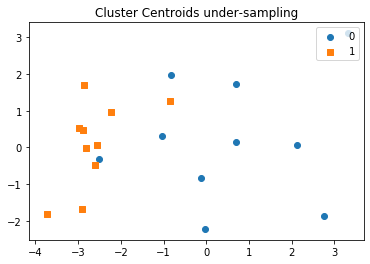

In [13]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

# Sur-échantillonnage : SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) consiste à synthétiser des éléments pour la classe minoritaire, en se basant sur ceux qui existent déjà. Elle fonctionne en choisissant au hasard un point de la classe minoritaire et en calculant les voisins les plus proches pour ce point. Les points de synthèse sont ajoutés entre le point choisi et ses voisins.

Nous utiliserons ratio='minorité' pour rééchantillonner la classe minoritaire.

Traduit avec www.DeepL.com/Translator (version gratuite)

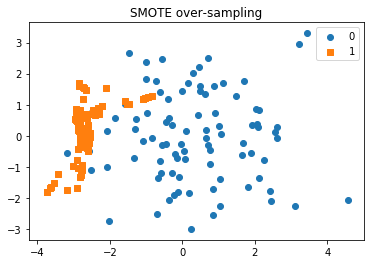

In [14]:
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [15]:
from collections import Counter


In [16]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 90, 1: 90})


In [17]:
#!pip install imblearn
#!pip install imbalanced-learn==0.5.0